# Homework 2

Defind subroutine for plotting

In [1]:
def plotpattern(rows, columns, plottype, x, y, title, xlabel):
    plt.figure(figsize = (10,10))
    for i in range(rows*columns):
        ax = plt.subplot(rows,columns,i+1, projection='polar')
        if plottype[i][0] == 'theta':            
            ax.set_theta_offset(np.pi/2)
            ax.set_theta_direction(-1)
            ax.plot(x[i], 10*np.log10(y[i]))
            ax.set_rmax(0)
            ax.set_rmin(-30)
            ax.set_title(title[i][0], y=1.1)
            ax.set_xlabel(xlabel[i][0])
        elif plottype[i][0] == 'phi':
            ax.set_theta_offset(-np.pi/2)
            ax.plot(x[i], 10*np.log10(y[i]))
            ax.set_rmax(0)
            ax.set_rmin(-30)
            ax.set_title(title[i][0], y=1.1)
            ax.set_xlabel(xlabel[i][0])
        else:
            print('No such plot type!')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

### Problem 1 (a)

In [2]:
# importing libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import argrelextrema
np.set_printoptions(suppress=True, precision=4)

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = \frac{\cos^2(\frac{3}{2}\pi\cos{\theta})}{\sin^2(\theta)}$ <br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [54]:
theta = np.arange(-np.pi, np.pi, np.pi/100)[1:-1]
def P_un(theta, phi):
    return (np.cos(3*np.pi/2*np.cos(theta))/np.sin(theta))**2
P_un_max = max(P_un(theta,0))
def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max
def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

Compute beam solid angle <br/>
$\Omega_A = \int_0^{2\pi}\int_0^{\pi}P_n\sin(\theta)d\theta d\phi$

In [4]:
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle,2))

beam solid angle =  5.65


Compute directivity
$D = \frac{4\pi}{\Omega_A}$

In [5]:
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

directivity =  2.22
directivity (dB) =  3.47


Find local maxima on the radiation pattern

In [6]:
max_ind = argrelextrema(P_un(theta,0), np.greater)[0]
print('angles of local maxima (deg) = ', theta[max_ind]/np.pi*180)
print('corresponding directivities (linear) = ', P_n(theta[max_ind],0))

angles of local maxima (deg) =  [-136.8  -90.   -43.2   43.2   90.   136.8]
corresponding directivities (linear) =  [1.     0.5114 1.     1.     0.5114 1.    ]


Compute radiation resistance <br/>
 - $R_r = \frac{2P_{rad}}{\lvert I(0)\rvert^2}$
 - $I(0) = -I_m$
 - $P_{rad} = U_{max}\Omega_A = CI_m^2P_{un,max}\Omega_A$ <br/>
 where $C = \frac{1}{2}\frac{\eta}{(2\pi)^2}$

In [7]:
C = 0.5*120*np.pi/(2*np.pi)**2
R_r = 2*C*P_un_max*beam_solid_angle
print(r'radiation resistance = ', round(R_r,2))

radiation resistance =  105.49


Plot E-plane pattern (linear, linear)

Text(0.5, 1.0, 'E-plane Pattern (linear rectangular plot)')

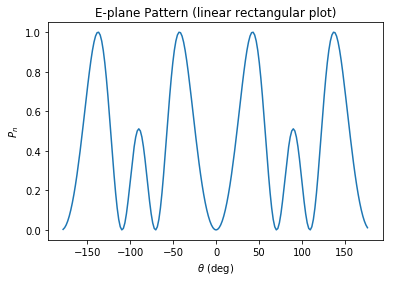

In [61]:
plt.plot(theta/np.pi*180, P_n(theta, 0)) # phi = np.pi leads to the same values
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$P_n$')
plt.title(r"E-plane Pattern (linear rectangular plot)")

### Problem 1 (b)

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = \lvert AF\cdot EF\rvert^2 = \lvert2\cos(4\pi \cos\theta)\sin\theta\rvert^2$ <br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [9]:
theta = np.arange(-np.pi, np.pi, np.pi/200)[1:-1]
def P_un(theta, phi):
    return (2*np.cos(4*np.pi*np.cos(theta)))**2
P_un_max = max(P_un(theta,0))
def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

Plot E-plane pattern (angular)

Text(0.5, 0, '$\\theta$')

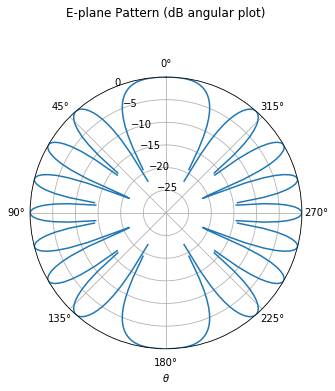

In [10]:
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.plot(theta, 10*np.log10(P_n(theta, 0)))
ax.set_rmax(0)
ax.set_rmin(-30)
# ax.set_rlabel_position(-135)  # Move radial labels away from plotted line
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.2)
ax.set_xlabel(r'$\theta$')

### Problem 4 (a)

Define normalized pattern function <br/>
$P_n(\theta,\phi) = \sin^2(\frac{\pi}{2}\sin\theta\sin\phi)\cos^2(\frac{\pi}{2}\sin\theta\cos\phi)\sin^2\theta$ $(0<\phi<\pi)$

In [11]:
theta = np.linspace(0, np.pi, 200)[1:-1]
phi = np.linspace(0, np.pi, 200)[1:-1]
def P_n(theta, phi):
    return np.sin(np.pi/2*np.sin(theta)*np.sin(phi))**2*np.cos(np.pi/2*np.sin(theta)*np.cos(phi))**2*np.sin(theta)**2
def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

Plot E- ($\phi = \frac{\pi}{2}$) and H- ($\theta = \frac{\pi}{2}$) plane pattern (angular)

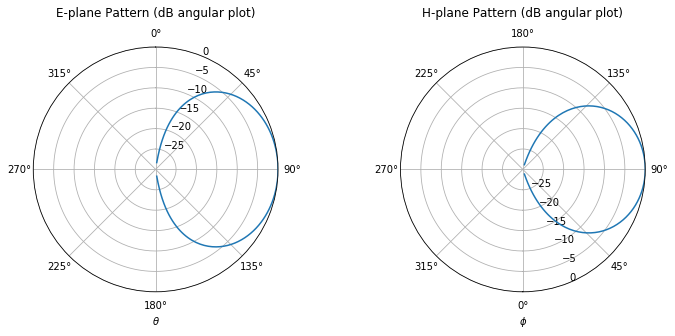

In [12]:
plt.figure(figsize = (10,10))
ax = plt.subplot(121, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(122, projection='polar')
ax.set_theta_offset(-np.pi/2)
ax.plot(phi, 10*np.log10(P_n(np.pi/2, phi)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [13]:
beam_solid_angle = integrate.dblquad(integrand, 0, np.pi, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  1.39
directivity =  9.03
directivity (dB) =  9.56


Compute 3dB beamwidths

In [14]:
# E-plane
ind1_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

# H-plane
ind1_H = np.where(10*np.log10(P_n(np.pi/2, phi))>-3)[0][0]
ind2_H = np.where(10*np.log10(P_n(np.pi/2, phi))>-3)[0][-1]
BW_3dB_H = (phi[ind2_H] - phi[ind1_H])/np.pi*180 # degrees
print('H-plane 3dB beamwidth = ', round(BW_3dB_H,2))

E-plane 3dB beamwidth =  80.5
H-plane 3dB beamwidth =  56.98


### Problem 4 (b)

$f = 0.85f_0$
- unnormalized: $P_n(\theta,\phi) = 16\sin^2(1.82\sin\theta\sin\phi)\cos^2(1.82\sin\theta\cos\phi)\sin^2\theta$ $(0<\phi<\pi)$
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$ 

$f = 1.1f_0$
- unnormalized: $P_n(\theta,\phi) = 16\sin^2(1.45\sin\theta\sin\phi)\cos^2(1.45\sin\theta\cos\phi)\sin^2\theta$ $(0<\phi<\pi)$
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [15]:
theta = np.linspace(0, np.pi, 200)[1:-1]
phi = np.linspace(0, np.pi, 200)[1:-1]
# f = 0.85*f_0
def P_un_1(theta, phi):
    return 16*np.sin(1.82*np.sin(theta)*np.sin(phi))**2*np.cos(1.82*np.sin(theta)*np.cos(phi))**2*np.sin(theta)**2
P_un_1_max = max([max(P_un_1(theta,np.pi/2)),max(P_un_1(np.pi/2, phi))])
def P_n_1(theta, phi):
    return P_un_1(theta, phi)/P_un_1_max
# f = 1.1*f_0
def P_un_2(theta, phi):
    return 16*np.sin(1.45*np.sin(theta)*np.sin(phi))**2*np.cos(1.45*np.sin(theta)*np.cos(phi))**2*np.sin(theta)**2
P_un_2_max = max([max(P_un_2(theta,np.pi/2)),max(P_un_2(np.pi/2, phi))])
def P_n_2(theta, phi):
    return P_un_2(theta, phi)/P_un_2_max

Plot E- ($\phi = \frac{\pi}{2}$) and H- ($\theta = \frac{\pi}{2}$) plane pattern (angular)

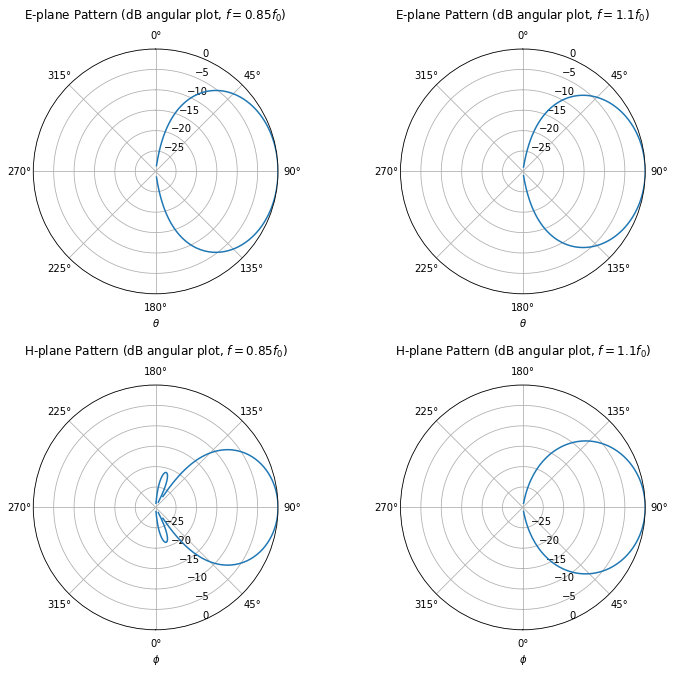

In [16]:
# E-plane Pattern (dB angular plot, f = 0.85f_0)
plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n_1(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot, $f = 0.85f_0$)', y=1.1)
ax.set_xlabel(r'$\theta$')
# E-plane Pattern (dB angular plot, f = 1.1f_0)
ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n_2(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot, $f = 1.1f_0$)', y=1.1)
ax.set_xlabel(r'$\theta$')
# H-plane Pattern (dB angular plot, f = 0.85f_0)
ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(-np.pi/2)
ax.plot(phi, 10*np.log10(P_n_1(np.pi/2, phi)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot, $f = 0.85f_0$)', y=1.1)
ax.set_xlabel(r'$\phi$')
# H-plane Pattern (dB angular plot, f = 1.1f_0)
ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(-np.pi/2)
ax.plot(phi, 10*np.log10(P_n_2(np.pi/2, phi)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot, $f = 1.1f_0$)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

### Problem 4 (c)

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = 16\sin^2(\frac{\pi}{2}\sin\theta\sin\phi)\cos^2(\frac{3\pi}{2}\sin\theta\cos\phi)\sin^2\theta$ $(0<\phi<\pi)$<br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [17]:
theta = np.linspace(0, np.pi, 200)[1:-1]
phi = np.linspace(0, np.pi, 200)[1:-1]
def P_un(theta, phi):
    return 16*np.sin(np.pi/2*np.sin(theta)*np.sin(phi))**2*np.cos(3*np.pi/2*np.sin(theta)*np.cos(phi))**2*np.sin(theta)**2
P_un_max = max([max(P_un(theta,np.pi/2)),max(P_un(np.pi/2, phi))])
def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max
def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

Plot E- ($\phi = \frac{\pi}{2}$) and H- ($\theta = \frac{\pi}{2}$) plane pattern (angular)

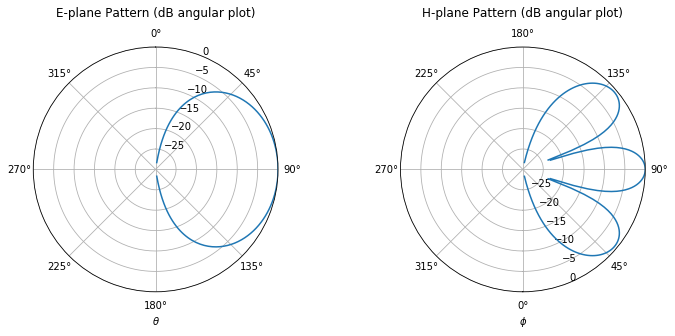

In [18]:
plt.figure(figsize = (10,10))
ax = plt.subplot(121, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(122, projection='polar')
ax.set_theta_offset(-np.pi/2)
ax.plot(phi, 10*np.log10(P_n(np.pi/2, phi)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [19]:
beam_solid_angle = integrate.dblquad(integrand, 0, np.pi, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  1.28
directivity =  9.83
directivity (dB) =  9.92


### Problem 5 (a)

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = 4\sin^2\theta(\cos(\pi\sin\theta\sin\phi)-\cos(\pi\sin\theta\cos\phi))^2$ $(\frac{\pi}{4}<\phi<\frac{3\pi}{4})$<br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [20]:
theta = np.linspace(0, np.pi, 200)[1:-1]
phi = np.linspace(np.pi/4, 3*np.pi/4, 200)[1:-1]
def P_un(theta, phi):
    return 4*np.sin(theta)**2*(np.cos(np.pi*np.sin(theta)*np.sin(phi))-np.cos(np.pi*np.sin(theta)*np.cos(phi)))**2
P_un_max = max([max(P_un(theta,np.pi/2)),max(P_un(np.pi/2, phi))])
def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max
def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

Plot E- ($\phi = \frac{\pi}{2}$) and H- ($\theta = \frac{\pi}{2}$) plane pattern (angular)

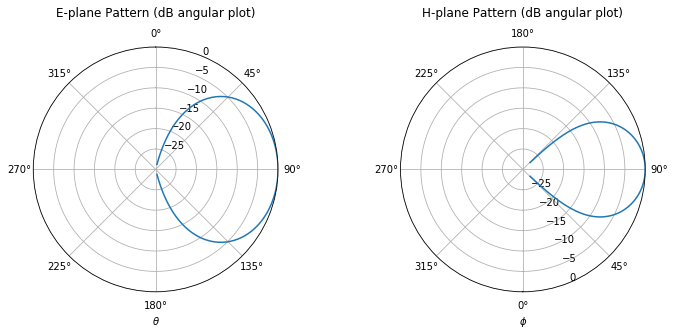

In [21]:
plt.figure(figsize = (10,10))
ax = plt.subplot(121, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(122, projection='polar')
ax.set_theta_offset(-np.pi/2)
ax.plot(phi, 10*np.log10(P_n(np.pi/2, phi)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

Compute beam solid angle <br/>
$\Omega_A = \int_0^{\pi}\int_0^{\pi}P_n\sin(\theta)d\theta d\phi$ <br/>
Compute directivity
$D = \frac{4\pi}{\Omega_A}$

In [22]:
beam_solid_angle = integrate.dblquad(integrand, np.pi/4, 3*np.pi/4, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  0.89
directivity =  14.15
directivity (dB) =  11.51


Compute 3dB beamwidths

In [23]:
# E-plane
ind1_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

# H-plane
ind1_H = np.where(10*np.log10(P_n(np.pi/2, phi))>-3)[0][0]
ind2_H = np.where(10*np.log10(P_n(np.pi/2, phi))>-3)[0][-1]
BW_3dB_H = (phi[ind2_H] - phi[ind1_H])/np.pi*180 # degrees
print('H-plane 3dB beamwidth = ', round(BW_3dB_H,2))

E-plane 3dB beamwidth =  75.08
H-plane 3dB beamwidth =  41.16


### Problem 5 (b)

$f = 0.8f_0$, $s = 0.4\lambda$
- unnormalized: $P_n(\theta,\phi) = 4\sin^2\theta(\cos(\frac{4\pi}{5}\sin\theta\sin\phi)-\cos(\frac{4\pi}{5}\sin\theta\cos\phi))^2$ $(\frac{\pi}{4}<\phi<\frac{3\pi}{4})$

$f = 1.2f_0$, $s = 0.6\lambda$
- unnormalized: $P_n(\theta,\phi) = 4\sin^2\theta(\cos(\frac{6\pi}{5}\sin\theta\sin\phi)-\cos(\frac{6\pi}{5}\sin\theta\cos\phi))^2$ $(\frac{\pi}{4}<\phi<\frac{3\pi}{4})$

In [52]:
theta = np.linspace(0, np.pi, 200)[1:-1]
phi = np.linspace(np.pi/4, 3*np.pi/4, 200)[1:-1]
# f = 0.8*f_0
def P_un_1(theta, phi):
    return 4*np.sin(theta)**2*(np.cos(4*np.pi/5*np.sin(theta)*np.sin(phi))-np.cos(4*np.pi/5*np.sin(theta)*np.cos(phi)))**2
P_un_1_max = max([max(P_un_1(theta,np.pi/2)),max(P_un_1(np.pi/2, phi))])
def P_n_1(theta, phi):
    return P_un_1(theta, phi)/P_un_1_max
# f = 1.2*f_0
def P_un_2(theta, phi):
    return 4*np.sin(theta)**2*(np.cos(6*np.pi/5*np.sin(theta)*np.sin(phi))-np.cos(6*np.pi/5*np.sin(theta)*np.cos(phi)))**2
P_un_2_max = max([max(P_un_2(theta,np.pi/2)),max(P_un_2(np.pi/2, phi))])
def P_n_2(theta, phi):
    return P_un_2(theta, phi)/P_un_2_max

Plot E- ($\phi = \frac{\pi}{2}$) and H- ($\theta = \frac{\pi}{2}$) plane pattern (angular)

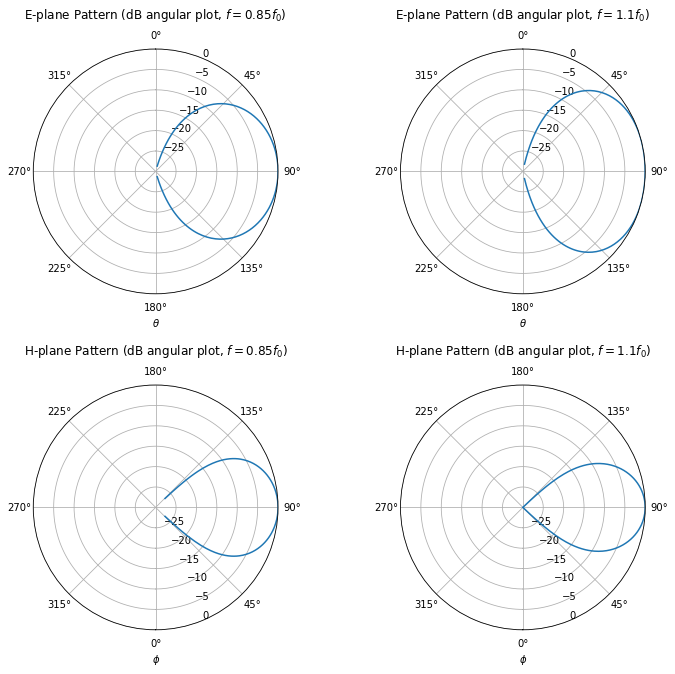

In [53]:
# E-plane Pattern (dB angular plot, f = 0.85f_0)
plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n_1(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot, $f = 0.85f_0$)', y=1.1)
ax.set_xlabel(r'$\theta$')
# E-plane Pattern (dB angular plot, f = 1.1f_0)
ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n_2(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot, $f = 1.1f_0$)', y=1.1)
ax.set_xlabel(r'$\theta$')
# H-plane Pattern (dB angular plot, f = 0.85f_0)
ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(-np.pi/2)
ax.plot(phi, 10*np.log10(P_n_1(np.pi/2, phi)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot, $f = 0.85f_0$)', y=1.1)
ax.set_xlabel(r'$\phi$')
# H-plane Pattern (dB angular plot, f = 1.1f_0)
ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(-np.pi/2)
ax.plot(phi, 10*np.log10(P_n_2(np.pi/2, phi)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot, $f = 1.1f_0$)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

### Problem 6 (a)

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = 4\frac{\sin^2(6\pi(1-\sin\theta\sin\phi))}{(1-\sin\theta\sin\phi)^2}\cdot\sin^2(2\pi\cos\theta)\cdot(\cos^2\theta\sin^2\phi+\cos^2\phi)$<br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [26]:
def P_un(theta, phi):
    arg = 1-np.sin(theta)*np.sin(phi)
    return 4*np.sin(6*np.pi*arg)**2/arg**2*np.sin(2*np.pi*np.cos(theta))**2*(np.cos(theta)**2*np.sin(phi)**2+np.cos(phi)**2)
P_un_max_E = max(P_un(theta,np.pi/2))
P_un_max_H = max(P_un(theta,0))
P_un_max = max(P_un_max_E, P_un_max_H)
def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max
def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

Plot E- ($\phi = \frac{\pi}{2}$) and H- ($\phi = 0$) plane pattern (angular)

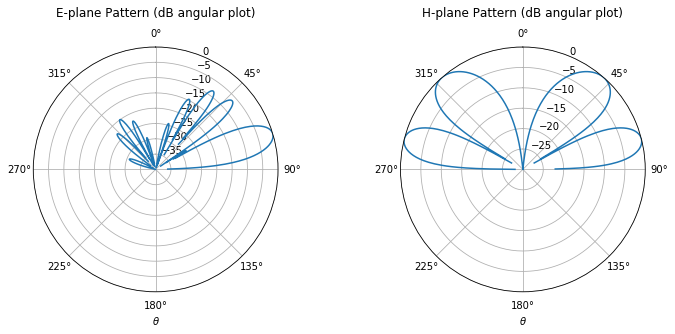

In [27]:
theta = np.arange(-np.pi/2, np.pi/2, np.pi/500)[1:-1]
phi = np.linspace(0, 2*np.pi, 300)[1:-1]
plt.figure(figsize = (10,10))
ax = plt.subplot(121, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)*P_un_max/P_un_max_E))
ax.set_rmax(0)
ax.set_rmin(-40)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(122, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, 0)*P_un_max/P_un_max_H))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

Text(0.5, 1.0, 'E-plane Pattern (linear rectangular plot)')

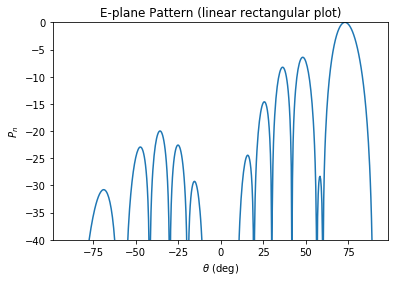

In [28]:
plt.plot(theta/np.pi*180, 10*np.log10(P_n(theta, np.pi/2)*P_un_max/P_un_max_E)) # phi = np.pi leads to the same values
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$P_n$')
plt.ylim(-40, 0)
plt.title(r"E-plane Pattern (linear rectangular plot)")

Compute beam solid angle <br/>
$\Omega_A = \int_0^{\pi}\int_0^{\pi}P_n\sin(\theta)d\theta d\phi$ <br/>
Compute directivity
$D = \frac{4\pi}{\Omega_A}$

In [29]:
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi/2)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  0.3
directivity =  41.49
directivity (dB) =  16.18


Find local maxima on the E- and H-plane

In [30]:
max_ind = argrelextrema(P_n(theta,np.pi/2), np.greater)[0]
print('angles of local maxima (deg) = ', theta[max_ind]/np.pi*180)
print('corresponding directivities (dB, normalized) = ', 10*np.log10(P_n(theta[max_ind],np.pi/2)*P_un_max/P_un_max_E))

angles of local maxima (deg) =  [-68.76 -57.96 -47.16 -35.64 -25.2  -15.48  -6.84   7.2   15.84  25.56
  36.36  48.24  58.32  73.08]
corresponding directivities (dB, normalized) =  [-30.7796 -50.2053 -22.9374 -19.9819 -22.5684 -29.2434 -43.6763 -41.5742
 -24.4365 -14.6099  -8.2516  -6.4244 -28.3258   0.007 ]


### Problem 7 (b, c)

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = 4\sin^2(\frac{\pi}{2}\cos\theta)\cdot(\cos^2\theta\cos^2\phi+\sin^2\phi)\cdot[2(\cos(0.6\pi\sin\theta\cos\phi)+\cos(0.6\pi\sin\theta\sin\phi))+4\cos(0.3\sqrt{2}\pi\sin\theta\cos\phi)\cdot\cos(0.3\sqrt{2}\pi\sin\theta\sin\phi)]^2$<br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [31]:
def P_un(theta, phi):
    arg1 = np.sin(theta)*np.cos(phi)
    arg2 = np.sin(theta)*np.sin(phi)
    EF = (np.cos(theta)*np.cos(phi))**2+np.sin(phi)**2
    AF = 2*(np.cos(0.6*np.pi*arg1)+np.cos(0.6*np.pi*arg2))+4*np.cos(0.3*np.sqrt(2)*np.pi*arg1)*np.cos(0.3*np.sqrt(2)*np.pi*arg2)
    return 4*np.sin(np.pi/2*np.cos(theta))**2*EF*AF**2
P_un_max_E = max(P_un(theta,0))
P_un_max_H = max(P_un(theta,np.pi/2))
P_un_max = max(P_un_max_E, P_un_max_H)
def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max
def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

Plot E- ($\phi = 0$) and H- ($\phi = \frac{\pi}{2}$) plane pattern (angular)

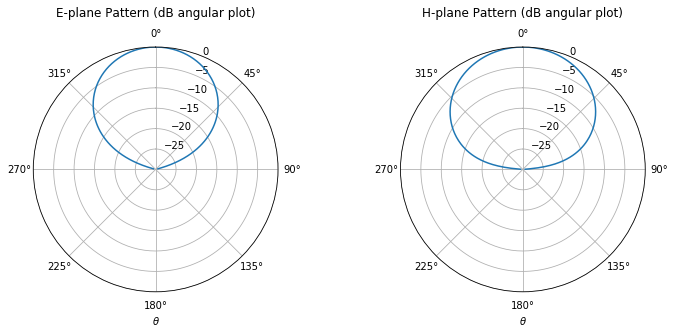

In [32]:
theta = np.linspace(-np.pi/2, np.pi/2, 300)[1:-1]
phi = np.linspace(0, 2*np.pi, 300)[1-1]
plt.figure(figsize = (10,10))
ax = plt.subplot(121, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, 0)*P_un_max/P_un_max_E))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(122, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)*P_un_max/P_un_max_H))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

Plot $\phi = 45^\circ$ plane pattern (angular)

Text(0.5, 0, '$\\theta$')

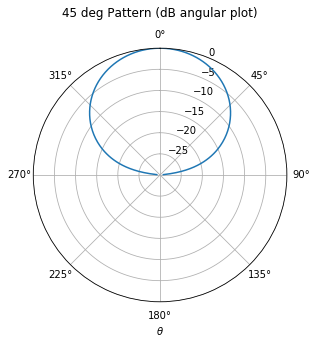

In [33]:
plt.figure(figsize = (10,10))
ax = plt.subplot(121, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, np.pi/4)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'45 deg Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

Compute beam solid angle <br/>
$\Omega_A = \int_0^{\pi}\int_0^{\pi}P_n\sin(\theta)d\theta d\phi$ <br/>
Compute directivity
$D = \frac{4\pi}{\Omega_A}$

In [34]:
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi/2)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  1.18
directivity =  10.62
directivity (dB) =  10.26


### Problem 8 (a)

Define  normalized pattern function <br/>
- normalized: $P_{n}(\theta,\phi) = \sin^2\theta\cdot\frac{\sin^2(\frac{48\pi}{5}\cos\theta)}{256\sin^2(\frac{3\pi}{5}\cos\theta)}$<br/>

In [35]:
theta = np.linspace(-np.pi, np.pi, 300)[1:-1]
def AF(theta, phi):
    return np.sin(48*np.pi/5*np.cos(theta))/np.sin(3*np.pi/5*np.cos(theta))/16
def P_n(theta, phi):
    EF = np.sin(theta)
    return (EF*AF(theta,phi))**2
P_un_max = max(P_un(theta,0))

Plot E- ($\phi = \frac{\pi}{2}$) plane element and array factor (angular)

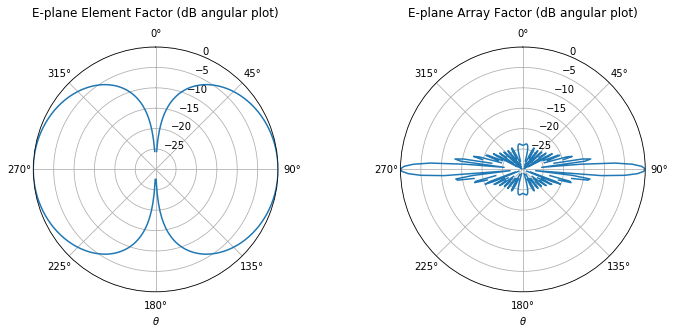

In [36]:
plt.figure(figsize = (10,10))
ax = plt.subplot(121, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(np.sin(theta)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Element Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(122, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(AF(theta,np.pi/2)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

Plot E- ($\phi = \frac{\pi}{2}$) plane pattern (angular)

Text(0.5, 0, '$\\theta$')

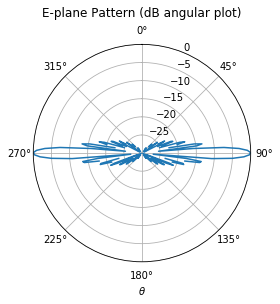

In [37]:
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

### Problem 8 (b, c)

Define unnormalized and normalized pattern functions <br/>
- unnormalized: $P_{un}(\theta,\phi) = \sin^2\theta\frac{\sin^2(8u)}{256\sin^2(\frac{u}{2})}$<br/>
where $u = \frac{6\pi}{5}\cos\theta+\alpha$
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [38]:
theta = np.linspace(-np.pi, np.pi, 300)[1:-1]
# alpha = -108 deg
def AF_1(theta, phi):
    u = 1.2*np.pi*np.cos(theta)-np.deg2rad(108)
    return np.sin(8*u)/np.sin(u/2)/16
def P_un_1(theta, phi):
    EF = np.sin(theta)
    return (EF*AF_1(theta,phi))**2
P_un_1_max = max(P_un_1(theta,np.pi/2))
def P_n_1(theta, phi):
    return P_un_1(theta, phi)/P_un_1_max
def integrand_1(theta, phi):
    return P_n_1(theta, phi)*np.sin(theta)

# alpha = -152.74 deg
def AF_2(theta, phi):
    u = 1.2*np.pi*np.cos(theta)-np.deg2rad(152.74)
    return np.sin(8*u)/np.sin(u/2)/16
def P_un_2(theta, phi):
    EF = np.sin(theta)
    return (EF*AF_2(theta,phi))**2
P_un_2_max = max(P_un_2(theta,np.pi/2))
def P_n_2(theta, phi):
    return P_un_2(theta, phi)/P_un_2_max
def integrand_2(theta, phi):
    return P_n_2(theta, phi)*np.sin(theta)

# alpha = -187.06 deg
def AF_3(theta, phi):
    u = 1.2*np.pi*np.cos(theta)-np.deg2rad(187.06)
    return np.sin(8*u)/np.sin(u/2)/16
def P_un_3(theta, phi):
    EF = np.sin(theta)
    return (EF*AF_3(theta,phi))**2
P_un_3_max = max(P_un_3(theta,np.pi/2))
def P_n_3(theta, phi):
    return P_un_3(theta, phi)/P_un_3_max
def integrand_3(theta, phi):
    return P_n_3(theta, phi)*np.sin(theta)

Plot E- ($\phi = \frac{\pi}{2}$) plane element and array factors (angular)

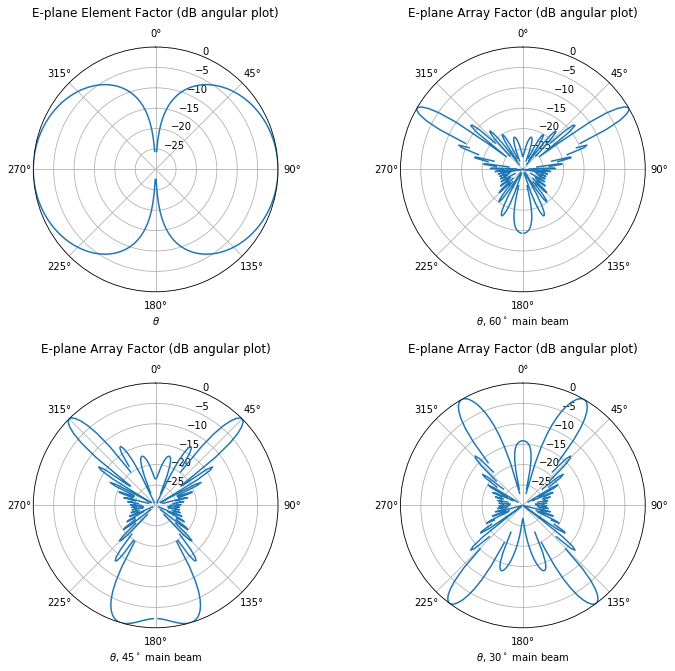

In [39]:
plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(np.sin(theta)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Element Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(AF_1(theta,np.pi/2)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 60$^\circ$ main beam')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(AF_2(theta,np.pi/2)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 45$^\circ$ main beam')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(AF_3(theta,np.pi/2)**2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 30$^\circ$ main beam')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

Plot E- ($\phi = \frac{\pi}{2}$) plane pattern (angular)

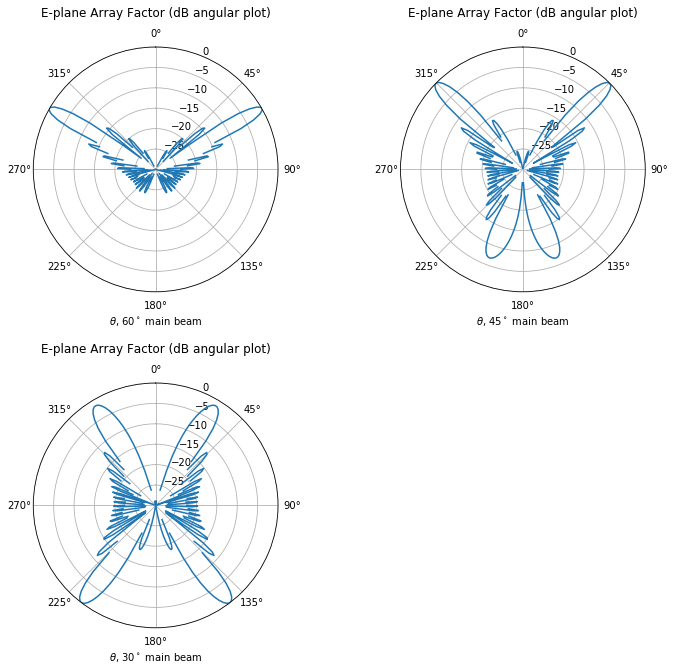

In [40]:
plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n_1(theta,np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 60$^\circ$ main beam')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n_2(theta,np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 45$^\circ$ main beam')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n_3(theta,np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Array Factor (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$, 30$^\circ$ main beam')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

Compute beam solid angle <br/>
$\Omega_A = \int_0^{\pi}\int_0^{\pi}P_n\sin(\theta)d\theta d\phi$ <br/>
Compute directivity
$D = \frac{4\pi}{\Omega_A}$

In [41]:
beam_solid_angle_1 = integrate.dblquad(integrand_1, 0, 2*np.pi, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle_1,2))
D_1 = 4*np.pi/beam_solid_angle_1
D_1_dB = 10*np.log10(D_1)
print('directivity = ', round(D_1,2))
print('directivity (dB) = ', round(D_1_dB,2))

beam_solid_angle_2 = integrate.dblquad(integrand_2, 0, 2*np.pi, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle_2,2))
D_2 = 4*np.pi/beam_solid_angle_2
D_2_dB = 10*np.log10(D_2)
print('directivity = ', round(D_2,2))
print('directivity (dB) = ', round(D_2_dB,2))

beam_solid_angle_3 = integrate.dblquad(integrand_3, 0, 2*np.pi, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle_3,2))
D_3 = 4*np.pi/beam_solid_angle_3
D_3_dB = 10*np.log10(D_3)
print('directivity = ', round(D_3,2))
print('directivity (dB) = ', round(D_3_dB,2))

beam solid angle =  0.67
directivity =  18.83
directivity (dB) =  12.75
beam solid angle =  0.78
directivity =  16.21
directivity (dB) =  12.1
beam solid angle =  1.1
directivity =  11.38
directivity (dB) =  10.56


### Problem 9 (1)

Define normalized pattern functions for arrays<br/>
$P_{n}(\theta,\phi) = \frac{\sin^2(\frac{N}{2}kd\cos\theta)}{N^2\sin^2(\frac{1}{2}kd\cos\theta)}$

In [42]:
def P_n(N, kd):
    return lambda theta, phi : np.sin(N/2*kd*np.cos(theta))**2/(N*np.sin(kd*np.cos(theta)/2))**2

P_n_case1 = P_n(32, np.pi/2)
P_n_case2 = P_n(16, np.pi)
P_n_case3 = P_n(8, 2*np.pi)
P_n_case4 = P_n(8, 2*np.pi*0.95)

Plot E- ($\phi = 0$) plane array factors (angular)

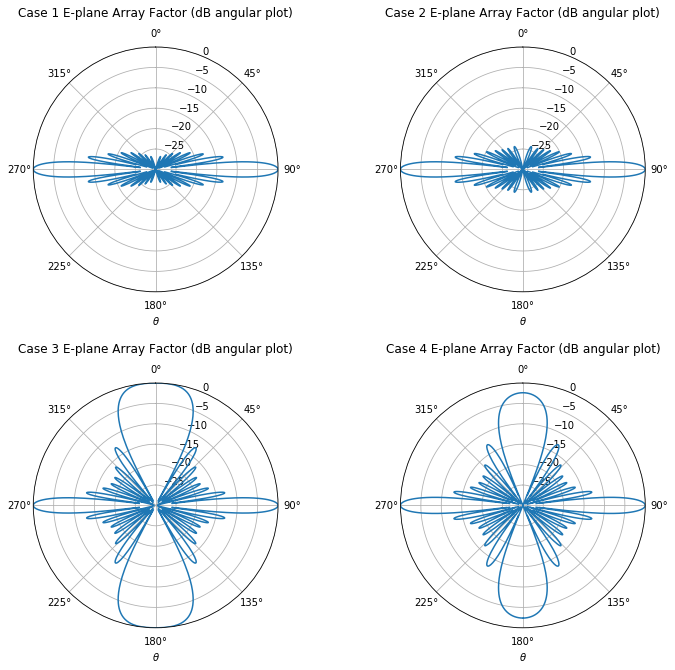

In [43]:
theta = np.arange(-np.pi, np.pi, np.pi/500)
rows = 2
columns = 2
plottype = np.tile(np.array(['theta']), (4, 1))
x = np.tile(theta, (4, 1))
y = np.stack((P_n_case1(theta, 0), P_n_case2(theta, 0), P_n_case3(theta, 0), P_n_case4(theta, 0)))
title = np.array(['Case %d E-plane Array Factor (dB angular plot)' % i for i in (np.arange(4)+1)]).reshape(4, 1)
xlabel = np.tile(np.array([r'$\theta$']), (4, 1))
        
plotpattern(rows, columns, plottype, x, y, title, xlabel)

Find local maxima on the radiation pattern

In [44]:
print('Case 1')
max_ind = argrelextrema(P_n_case1(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n_case1(angles,0)))

min_ind = argrelextrema(P_n_case1(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

print('\nCase 2')
max_ind = argrelextrema(P_n_case2(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n_case2(angles,0)))

min_ind = argrelextrema(P_n_case2(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

print('\nCase 3')
max_ind = argrelextrema(P_n_case3(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n_case3(angles,0)))

min_ind = argrelextrema(P_n_case3(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

print('\nCase 4')
max_ind = argrelextrema(P_n_case4(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n_case4(angles,0)))

min_ind = argrelextrema(P_n_case4(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

Case 1
angles of local maxima (deg) =  [ 20.52  36.    46.8   55.8   64.44  72.    79.56  90.   100.44 108.
 115.56 124.2  133.2  144.   159.48]
corresponding levels (dB) =  [-26.64   -25.6047 -24.3142 -22.7173 -20.6373 -17.7523 -13.248    0.
 -13.248  -17.7523 -20.6373 -22.7173 -24.3142 -25.6047 -26.64  ]
angles of nulls (deg) =  [  0.    28.8   41.4   51.48  60.12  68.04  75.6   82.8   97.2  104.4
 111.96 119.88 128.52 138.6  151.2 ]

Case 2
angles of local maxima (deg) =  [ 20.52  35.64  46.8   55.8   64.08  72.    79.56  90.   100.44 108.
 115.92 124.2  133.2  144.36 159.48]
corresponding levels (dB) =  [-24.0417 -23.701  -22.9933 -21.8419 -20.1236 -17.494  -13.1598   0.
 -13.1598 -17.494  -20.1236 -21.8419 -22.9933 -23.701  -24.0417]
angles of nulls (deg) =  [  0.    28.8   41.4   51.48  60.12  68.04  75.6   82.8   97.2  104.4
 111.96 119.88 128.52 138.6  151.2 ]

Case 3
angles of local maxima (deg) =  [  0.    34.92  46.44  55.8   64.08  72.    79.56  90.   100.44 108.
 115.92 12

Find 3dB beamwidths

In [45]:
# E-plane
ind1_E = np.where(10*np.log10(P_n_case1(theta[theta>0], 0))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n_case1(theta[theta>0], 0))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('Case 1 E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

ind1_E = np.where(10*np.log10(P_n_case2(theta[theta>0], 0))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n_case2(theta[theta>0], 0))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('Case 2 E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

ind1_E = np.where(10*np.log10(P_n_case3(theta[np.logical_and(theta>np.pi/4, theta<3*np.pi/4)], 0))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n_case3(theta[np.logical_and(theta>np.pi/4, theta<3*np.pi/4)], 0))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('Case 3 E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

ind1_E = np.where(10*np.log10(P_n_case4(theta[np.logical_and(theta>np.pi/4, theta<3*np.pi/4)], 0))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n_case4(theta[np.logical_and(theta>np.pi/4, theta<3*np.pi/4)], 0))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('Case 4 E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

Case 1 E-plane 3dB beamwidth =  5.76
Case 2 E-plane 3dB beamwidth =  5.76
Case 3 E-plane 3dB beamwidth =  5.76
Case 4 E-plane 3dB beamwidth =  6.48


### Problem 9 (2)

Define normalized pattern functions for arrays<br/>
$P_{n}(\theta,\phi) = \sin^2\theta\frac{\sin^2(\frac{N}{2}kd\cos\theta)}{N^2\sin^2(\frac{1}{2}kd\cos\theta)}$

In [46]:
def P_n(N, kd):
    return lambda theta, phi : np.sin(theta)**2*np.sin(N/2*kd*np.cos(theta))**2/(N*np.sin(kd*np.cos(theta)/2))**2

P_n_case3 = P_n(8, 2*np.pi)
P_n_case4 = P_n(8, 2*np.pi*0.95)

Plot E- ($\phi = 0$) plane array factors (angular)

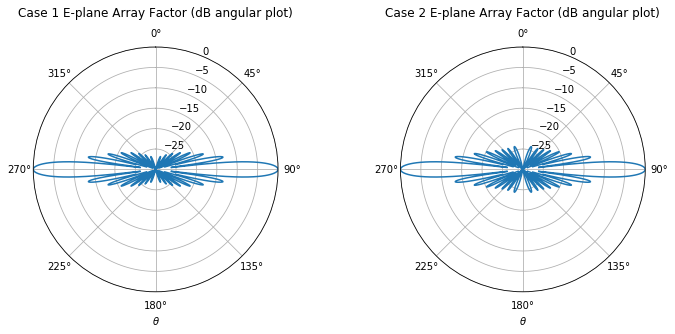

In [47]:
theta = np.arange(-np.pi, np.pi, np.pi/500)
rows = 1
columns = 2
plottype = np.tile(np.array(['theta']), (2, 1))
x = np.tile(theta, (2, 1))
y = np.stack((P_n_case1(theta, 0), P_n_case2(theta, 0), P_n_case3(theta, 0), P_n_case4(theta, 0)))
title = np.array(['Case %d E-plane Array Factor (dB angular plot)' % i for i in (np.arange(2)+1)]).reshape(2, 1)
xlabel = np.tile(np.array([r'$\theta$']), (2, 1))
        
plotpattern(rows, columns, plottype, x, y, title, xlabel)

Find local maxima on the radiation pattern

In [48]:
print('Case 3')
max_ind = argrelextrema(P_n_case3(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n_case3(angles,0)))

min_ind = argrelextrema(P_n_case3(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

print('\nCase 4')
max_ind = argrelextrema(P_n_case4(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n_case4(angles,0)))

min_ind = argrelextrema(P_n_case4(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

Case 3
angles of local maxima (deg) =  [ 17.64  35.28  46.44  55.8   64.08  72.    79.56  90.   100.44 108.
 115.92 124.2  133.56 144.72 162.36]
corresponding levels (dB) =  [-12.4637 -17.6061 -19.2337 -19.5451 -18.8125 -16.8637 -12.9481   0.
 -12.9481 -16.8637 -18.8125 -19.5451 -19.2337 -17.6061 -12.4637]
angles of nulls (deg) =  [  0.    28.8   41.4   51.48  60.12  68.04  75.6   82.8   97.2  104.4
 111.96 119.88 128.52 138.6  151.2 ]

Case 4
angles of local maxima (deg) =  [ 12.96  30.96  43.56  53.64  62.64  70.92  79.2   90.   100.8  109.08
 117.36 126.36 136.44 149.04 167.04]
corresponding levels (dB) =  [-18.6996 -18.6541 -19.6784 -19.7715 -18.921  -16.9241 -12.9608   0.
 -12.9608 -16.9241 -18.921  -19.7715 -19.6784 -18.6541 -18.6996]
angles of nulls (deg) =  [  0.    23.04  37.8   48.96  58.32  66.6   74.88  82.44  97.56 105.12
 113.4  121.68 131.04 142.2  156.96]


Find 3dB beamwidths

In [49]:
# E-plane
ind1_E = np.where(10*np.log10(P_n_case3(theta[np.logical_and(theta>np.pi/4, theta<3*np.pi/4)], 0))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n_case3(theta[np.logical_and(theta>np.pi/4, theta<3*np.pi/4)], 0))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('Case 3 E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

ind1_E = np.where(10*np.log10(P_n_case4(theta[np.logical_and(theta>np.pi/4, theta<3*np.pi/4)], 0))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n_case4(theta[np.logical_and(theta>np.pi/4, theta<3*np.pi/4)], 0))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('Case 4 E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

Case 3 E-plane 3dB beamwidth =  5.76
Case 4 E-plane 3dB beamwidth =  6.48
